In [7]:
!pip install agate

     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 61kB 3.5MB/s 
  Created wheel for parsedatetime: filename=parsedatetime-2.5-cp36-none-any.whl size=42840 sha256=9087aec175dc2ad26bff967d26f7cd113971f729cc40878cd9ba767f961077aa
  Stored in directory: /root/.cache/pip/wheels/12/56/67/8421ce18d51e7e51b06224d9735cd3257c84d2eb929c734f89
Successfully built parsedatetime


In [9]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.6MB/s 


/usr/local/lib/python3.6/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/vaderSentiment-3.2.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>


In [11]:
!pip install arrow

     |████████████████████████████████| 51kB 1.6MB/s 


/usr/local/lib/python3.6/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/arrow-0.15.5.dist-info/top_level.txt' mode='r' encoding='UTF-8'>


Sourced from: https://github.com/nprapps/trump-tweet-analysis/blob/master/trump-tweets.ipynb

In [0]:
# -*- coding: utf-8 -*-
%matplotlib inline

import agate
import warnings
import requests
import zipfile
import io
import json
import unicodedata

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import locale
import arrow
import xml.etree.ElementTree as ET
import seaborn as sns

from locale import atof
from dateutil import parser
from datetime import datetime


In [0]:
plt.style.use('seaborn-deep')
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Tweets_ALL.csv to Tweets_ALL.csv


In [0]:
from google.colab import files
uploaded = files.upload()

Saving approval_polllist.csv to approval_polllist.csv


In [0]:
import os

tweets=pd.read_csv('Tweets_ALL.csv')
tweets=tweets.rename(columns={'text':'tweet'}) # remame text to tweet

pollist=pd.read_csv('approval_polllist.csv')



#Project Donald Trump Tweets

In [85]:
tweets.head()

,Unnamed: 0,created_date,source,tweet,created_at,retweet_count,favorite_count,is_retweet,id_str,sentiment,neg,neu,pos,compound,id,human_date,month/day,year,month,year_month,day,day of week,hour,week,year_week,text encoded
0,0,2020-03-07 03:45:00,Twitter for iPhone,Thank you @GovBillLee and @MariaLeeTN. My Admi...,3/7/2020 3:45,9221,37544,False,1.236140e+18,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.0,0.753,0.247,0.7840,1.236140e+18,"Friday, Mar 6, 2020 10:45 PM",3/6/2020,2020,3,2020-03,6,5,22,9,2020-09,b'Thank you @GovBillLee and @MariaLeeTN. My Ad...
1,1,2020-03-07 01:08:00,Twitter for iPhone,....I want to thank Acting Chief Mick Mulvaney...,3/7/2020 1:08,12193,57450,False,1.236100e+18,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",0.0,0.597,0.403,0.9158,1.236100e+18,"Friday, Mar 6, 2020 8:08 PM",3/6/2020,2020,3,2020-03,6,5,20,9,2020-09,b'....I want to thank Acting Chief Mick Mulvan...
2,2,2020-03-07 01:08:00,Twitter for iPhone,I am pleased to announce that Congressman Mark...,3/7/2020 1:08,23997,108097,False,1.236100e+18,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.0,0.816,0.184,0.7264,1.236100e+18,"Friday, Mar 6, 2020 8:08 PM",3/6/2020,2020,3,2020-03,6,5,20,9,2020-09,b'I am pleased to announce that Congressman Ma...
3,3,2020-03-07 00:19:00,Twitter for iPhone,Congratulations to @FoxNews! https://t.co/ED5t...,3/7/2020 0:19,17632,78051,False,1.236080e+18,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.0,0.417,0.583,0.6360,1.236080e+18,"Friday, Mar 6, 2020 7:19 PM",3/6/2020,2020,3,2020-03,6,5,19,9,2020-09,b'Congratulations to @FoxNews! https://t.co/ED...
4,4,2020-03-06 21:21:00,Twitter for iPhone,https://t.co/TZ6o5jjPH7,3/6/2020 21:21,10410,41426,False,1.236040e+18,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,1.236040e+18,"Friday, Mar 6, 2020 4:21 PM",3/6/2020,2020,3,2020-03,6,5,16,9,2020-09,b'https://t.co/TZ6o5jjPH7'


In [0]:
analyzer = SentimentIntensityAnalyzer()
def sentiment(row):
    return analyzer.polarity_scores(row.tweet)

In [0]:
tweets['sentiment']= tweets.apply(sentiment, axis=1)

In [88]:
print(tweets.sentiment[0])

{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.784}


In [89]:
tweets.sentiment[0]['neg']

0.0

In [0]:
def neg(row):
    return row.sentiment['neg']

def neu(row):
    return row.sentiment['neu']

def pos(row):
    return row.sentiment['pos']

def compound(row):
    return row.sentiment['compound']


In [0]:
tweets['neg']=tweets.apply(neg, axis=1)
tweets['neu']=tweets.apply(neu, axis=1)
tweets['pos']=tweets.apply(pos, axis=1)
tweets['compound']=tweets.apply(compound, axis=1)

In [92]:
tweets.head()

,Unnamed: 0,created_date,source,tweet,created_at,retweet_count,favorite_count,is_retweet,id_str,sentiment,neg,neu,pos,compound,id,human_date,month/day,year,month,year_month,day,day of week,hour,week,year_week,text encoded
0,0,2020-03-07 03:45:00,Twitter for iPhone,Thank you @GovBillLee and @MariaLeeTN. My Admi...,3/7/2020 3:45,9221,37544,False,1.236140e+18,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.0,0.753,0.247,0.7840,1.236140e+18,"Friday, Mar 6, 2020 10:45 PM",3/6/2020,2020,3,2020-03,6,5,22,9,2020-09,b'Thank you @GovBillLee and @MariaLeeTN. My Ad...
1,1,2020-03-07 01:08:00,Twitter for iPhone,....I want to thank Acting Chief Mick Mulvaney...,3/7/2020 1:08,12193,57450,False,1.236100e+18,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",0.0,0.597,0.403,0.9158,1.236100e+18,"Friday, Mar 6, 2020 8:08 PM",3/6/2020,2020,3,2020-03,6,5,20,9,2020-09,b'....I want to thank Acting Chief Mick Mulvan...
2,2,2020-03-07 01:08:00,Twitter for iPhone,I am pleased to announce that Congressman Mark...,3/7/2020 1:08,23997,108097,False,1.236100e+18,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.0,0.816,0.184,0.7264,1.236100e+18,"Friday, Mar 6, 2020 8:08 PM",3/6/2020,2020,3,2020-03,6,5,20,9,2020-09,b'I am pleased to announce that Congressman Ma...
3,3,2020-03-07 00:19:00,Twitter for iPhone,Congratulations to @FoxNews! https://t.co/ED5t...,3/7/2020 0:19,17632,78051,False,1.236080e+18,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.0,0.417,0.583,0.6360,1.236080e+18,"Friday, Mar 6, 2020 7:19 PM",3/6/2020,2020,3,2020-03,6,5,19,9,2020-09,b'Congratulations to @FoxNews! https://t.co/ED...
4,4,2020-03-06 21:21:00,Twitter for iPhone,https://t.co/TZ6o5jjPH7,3/6/2020 21:21,10410,41426,False,1.236040e+18,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,1.236040e+18,"Friday, Mar 6, 2020 4:21 PM",3/6/2020,2020,3,2020-03,6,5,16,9,2020-09,b'https://t.co/TZ6o5jjPH7'


In [0]:
tweets['created_date'] = pd.to_datetime(tweets['created_at'])
tweets['id'] = tweets['id_str']
tweets.tweet.fillna(tweets.tweet, inplace=True)

In [0]:
# Stub for helpers
# convert utc to est
def convertUTCtoFull(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('dddd, MMM D, YYYY h:mm A')

# convert to year
def convertUTCtoYear(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY')

# convert to month
def convertUTCtoMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('MM')

# convert to year-month
def convertUTCtoYearMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM')

# convert to day
def convertUTCtoDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('D')

# convert to month/day
def convertUTCtoMonthDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM-DD')

# convert to day of week
def convertUTCtoDayOfWeek(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('d')

# convert to time
def convertUTCtoHourOfDay(date):
    utc = arrow.get(date)
    return int(utc.to('US/Eastern').format('HH'))

# convert to week of year
def convertUTCtoWeekNumber(date):
    return int(date.strftime('%U'))

# convert to year + week of year
def convertUTCtoYearWeekNumber(date):
    utc = arrow.get(date)
    year = utc.to('US/Eastern').format('YYYY')
    weekno = int(date.strftime('%U'))
    return str(year) + '-' + str(weekno).zfill(2)

# Strip HTML
def stripHTML(html):
    tree = ET.fromstring(html)
    return ET.tostring(tree, encoding='utf8', method='text')

# Encode with closest thing to character
def encodeText(line):
    line = unicodedata.normalize('NFKD', line).encode('ascii','ignore')
    return line

In [117]:
len(tweets.index)

15984

In [0]:
tweets['created_date'] = pd.to_datetime(tweets['created_at'])
tweets['id'] = tweets['id_str']
tweets.tweet.fillna(tweets.tweet, inplace=True)

In [34]:
tweets['human_date'] = tweets['created_date'].apply(convertUTCtoFull)
tweets['month/day'] = tweets['created_date'].apply(convertUTCtoMonthDay)
tweets['year'] = tweets['created_date'].apply(convertUTCtoYear)
tweets['month'] = tweets['created_date'].apply(convertUTCtoMonth)
tweets['year_month'] = tweets['created_date'].apply(convertUTCtoYearMonth)
tweets['day'] = tweets['created_date'].apply(convertUTCtoDay)
tweets['day of week'] = tweets['created_date'].apply(convertUTCtoDayOfWeek)
tweets['hour'] = tweets['created_date'].apply(convertUTCtoHourOfDay)
tweets['week'] = tweets['created_date'].apply(convertUTCtoWeekNumber) 
tweets['year_week'] = tweets['created_date'].apply(convertUTCtoYearWeekNumber)
tweets['text encoded'] = tweets['tweet'].apply(encodeText)
tweets.set_index('created_date', inplace=True)

tweets.head()

,Unnamed: 0,source,tweet,created_at,retweet_count,favorite_count,is_retweet,id_str,sentiment,neg,neu,pos,compound,id,human_date,month/day,year,month,year_month,day,day of week,hour,week,year_week,text encoded
created_date,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-07 03:45:00,0,Twitter for iPhone,Thank you @GovBillLee and @MariaLeeTN. My Admi...,3/7/2020 3:45,9221,37544,False,1.236140e+18,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.0,0.753,0.247,0.7840,1.236140e+18,"Friday, Mar 6, 2020 10:45 PM",2020-03-06,2020,03,2020-03,6,5,22,9,2020-09,b'Thank you @GovBillLee and @MariaLeeTN. My Ad...
2020-03-07 01:08:00,1,Twitter for iPhone,....I want to thank Acting Chief Mick Mulvaney...,3/7/2020 1:08,12193,57450,False,1.236100e+18,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",0.0,0.597,0.403,0.9158,1.236100e+18,"Friday, Mar 6, 2020 8:08 PM",2020-03-06,2020,03,2020-03,6,5,20,9,2020-09,b'....I want to thank Acting Chief Mick Mulvan...
2020-03-07 01:08:00,2,Twitter for iPhone,I am pleased to announce that Congressman Mark...,3/7/2020 1:08,23997,108097,False,1.236100e+18,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.0,0.816,0.184,0.7264,1.236100e+18,"Friday, Mar 6, 2020 8:08 PM",2020-03-06,2020,03,2020-03,6,5,20,9,2020-09,b'I am pleased to announce that Congressman Ma...
2020-03-07 00:19:00,3,Twitter for iPhone,Congratulations to @FoxNews! https://t.co/ED5t...,3/7/2020 0:19,17632,78051,False,1.236080e+18,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.0,0.417,0.583,0.6360,1.236080e+18,"Friday, Mar 6, 2020 7:19 PM",2020-03-06,2020,03,2020-03,6,5,19,9,2020-09,b'Congratulations to @FoxNews! https://t.co/ED...
2020-03-06 21:21:00,4,Twitter for iPhone,https://t.co/TZ6o5jjPH7,3/6/2020 21:21,10410,41426,False,1.236040e+18,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,1.236040e+18,"Friday, Mar 6, 2020 4:21 PM",2020-03-06,2020,03,2020-03,6,5,16,9,2020-09,b'https://t.co/TZ6o5jjPH7'


##Tweets Month of the Day

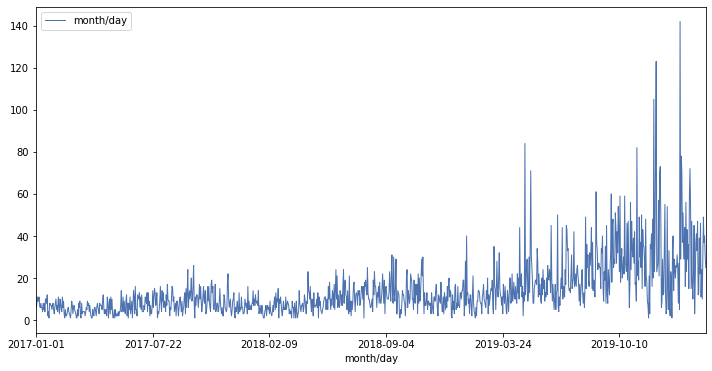

In [37]:

tweetsPerDay = tweets[['month/day']].groupby(tweets['month/day']).count()
# tweetsPerDay.iloc[::-1].plot(kind='barh', figsize=(12,100), fontsize=8)
tweetsPerDay.plot(kind='line', linewidth=1.0)

In [38]:
tweetsPerDay.describe()

,month/day
count,1149.000000
mean,13.911227
std,13.469314
min,1.000000
25%,6.000000
50%,10.000000
75%,17.000000
max,142.000000


##Group by Day of the week Tweets

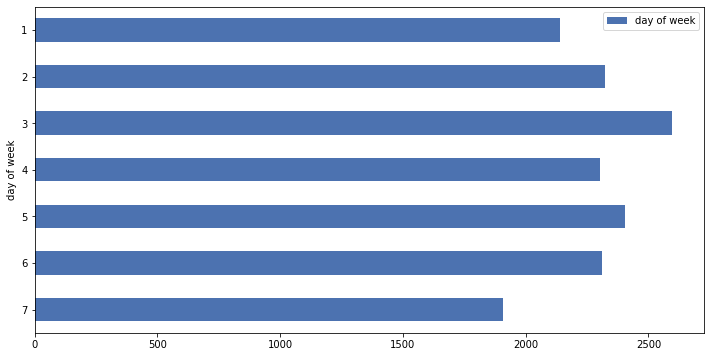

In [39]:
tweetsPerDayOfWeek = tweets[['day of week']].groupby(tweets['day of week']).count()
tweetsPerDayOfWeek.iloc[::-1].plot(kind='barh')
# tweetsPerDayOfWeek.plot(kind='bar')

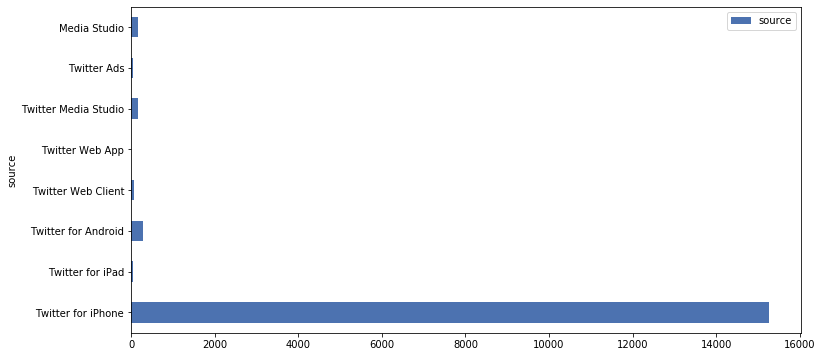

In [119]:
tweetsPerDayOfWeek = tweets[['source']].groupby(tweets['source']).count()
tweetsPerDayOfWeek.iloc[::-1].plot(kind='barh')

In [0]:
import nltk
from nltk.corpus import gutenberg
from pprint import pprint
import numpy as np

##Tweets by sources

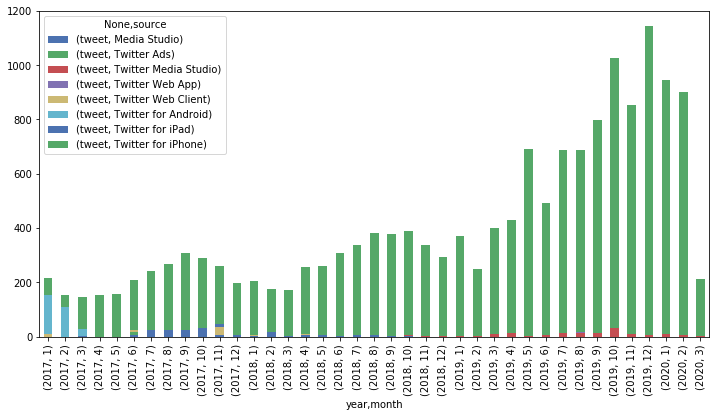

In [120]:
baseMonth = tweets[['source', 'year', 'month', 'tweet']].pivot_table(index=['year', 'month'], columns=['source'], aggfunc='count')

tweetsPerMonth = tweets[['source', 'year', 'month', 'tweet']].pivot_table(index=['year', 'month'], columns=['source'], aggfunc='count')
tweetsPerMonth = tweetsPerMonth.reindex_like(baseMonth)
# tweetsPerMonth.iloc[::-1].plot(kind='bar', stacked=True)
tweetsPerMonth.plot(kind='bar', stacked=True)

In [0]:
tweets_gb= tweets.groupby(['year_month']).mean().reset_index()

In [43]:
tweets_gb.head()

,year_month,Unnamed: 0,retweet_count,favorite_count,id_str,neg,neu,pos,compound,id,hour,week
0,2017-01,15875.0,20549.142857,92241.294931,8.207499e+17,0.093387,0.751581,0.155051,0.113000,8.207499e+17,11.691244,2.631336
1,2017-02,15690.0,22951.078431,108159.477124,8.310660e+17,0.118745,0.727843,0.153392,0.019695,8.310660e+17,12.013072,6.633987
2,2017-03,15541.0,17029.806897,74059.048276,8.425522e+17,0.073593,0.739807,0.186607,0.247508,8.425522e+17,12.496552,11.144828
3,2017-04,15392.5,14053.138158,60018.361842,8.540860e+17,0.076711,0.742474,0.180822,0.195849,8.540860e+17,12.197368,15.763158
4,2017-05,15238.0,16894.649682,63403.808917,8.645669e+17,0.082580,0.755529,0.161904,0.170706,8.645669e+17,11.700637,19.898089


In [0]:
def convertUTCtoYearMonth1(row):
    year_month = row['enddate'].split('/')
    year_month = '{0:04d}-{1:02d}'.format(int(year_month[2]),int(year_month[0]))
    return year_month

In [0]:
pollist['year_month']=pollist.apply(convertUTCtoYearMonth1,axis=1)

In [141]:
pollist.year_month.unique()

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03'], dtype=object)

In [0]:
pollist=pollist.groupby('year_month').mean().reset_index()

In [142]:
pollist.shape

(11275, 23)

##Tweets Reactions: Pos Tweets , Neg Tweets vs pos poll and Neg Poll

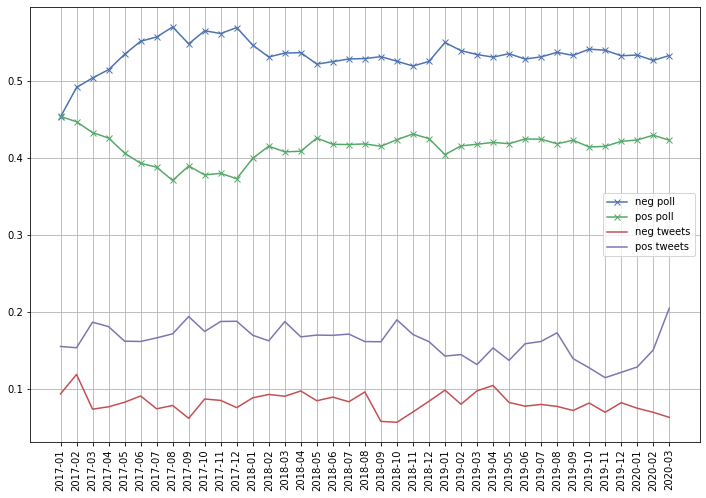

In [143]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1)
x=list(tweets_gb['year_month'])
y1=list(tweets_gb['pos'])
y2=list(tweets_gb['neg'])
x3=list(polls_gb['year_month'])
y3=list(polls_gb['adjusted_approve']/100)
y4=list(polls_gb['adjusted_disapprove']/100)
plt.plot(x3,y4,marker='x',label= 'neg poll')
plt.plot(x3,y3,marker='x', label= 'pos poll')
plt.plot(x,y2,label='neg tweets')
plt.plot(x,y1,label= 'pos tweets')
plt.legend()
ax.grid(True)
ax.xaxis.set_tick_params(rotation=90)
plt.show()
#tweets.plot(kind='line',x='created_at',y='pos', ax=ax)
#tweets.plot(kind='line',x='created_at',y='neg',color='red', ax=ax)

#tweets[['pos','neg']].plot.line()

In [0]:
mdf1=tweets

In [0]:
mdf1['dtg']=pd.to_datetime(mdf1['created_date'])
mdf1['pmonth']=mdf1.dtg.dt.to_period('M')
mdf1['pweek']=mdf1.dtg.dt.to_period('W')
mdf1['pdate']=mdf1.dtg.dt.to_period('D')
mdf1['phour']=mdf1.dtg.dt.to_period('H')
mdf1['hour']=mdf1.dtg.dt.hour
mdf1['dow']=mdf1.dtg.dt.weekday
mdf1['day_name']=mdf1.dtg.dt.weekday_name
mdf1['has_witch']=mdf1['tweet'].str.contains('witch',case=False)
mdf1['has_fake_news']=mdf1['tweet'].str.contains('fake news',case=False)
mdf1['has_witch_or_fake_news'] = mdf1['has_witch'] | mdf1['has_fake_news']

In [0]:
pollist['edtg']=pd.to_datetime(pollist['enddate'])
pollist['pmonth']=pollist.edtg.dt.to_period('M')
pollist['pweek']=pollist.edtg.dt.to_period('W')
pollist['pdate']=pollist.edtg.dt.to_period('D')
pollist['phour']=pollist.edtg.dt.to_period('H')
pollist['hour']=pollist.edtg.dt.hour
pollist['dow']=pollist.edtg.dt.weekday
pollist['day_name']=pollist.edtg.dt.weekday_name
pollist=pollist[pollist.subgroup=='All polls']

polls=pd.read_csv('approval_polllist.csv')

In [0]:
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 22

##over all Trend

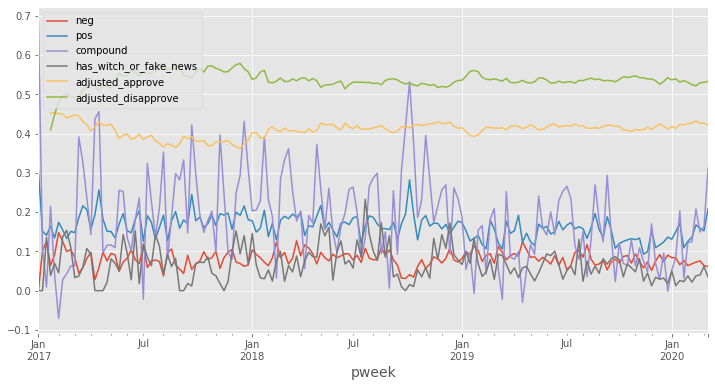

In [164]:
gb = ['pweek']

gdf = mdf1.groupby(gb)[['neg','pos','compound','has_witch_or_fake_news']].mean()
pgdf=pollist.groupby(gb)[['adjusted_approve','adjusted_disapprove']].mean()/100
odf['tweet_count'] = mdf1.groupby(gb)['tweet'].count()

odf=gdf.join(pgdf)
ax=odf.plot()

In [0]:
aax=sns.regplot(data=odf,x='compound',y='adjusted_approve')
ax.set_title('Compound Sentiment vs Approval Rating  (Weekly Means)')
plt.savefig(fig_path+r'\compound_vs_approval.png')

## Tweets word clouds

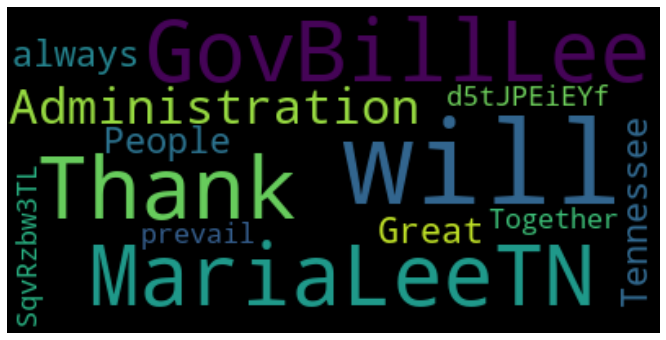

In [66]:
# Start with one review:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
tweets = mdf1.tweet[0]
stopwords = set(STOPWORDS)
# Create and generate a word cloud image:
stopwords.update(["wPk7QWpK8Z", "co", "https"])
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(tweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Data cleaning removing unneceraay words 'StopWords'

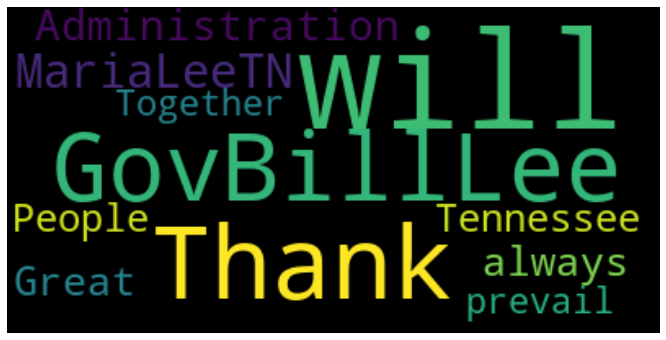

In [72]:
# Start with one review:
#text = mdf.Tweet_Text[1]7370
text = " ".join(review for review in mdf1.tweet)
# Create stopword list:

stopwords.update(["https", "CO", "amp", "one","Im","said","RT","d5tJPEiEYf","SqvRzbw3TL"])


# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(tweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

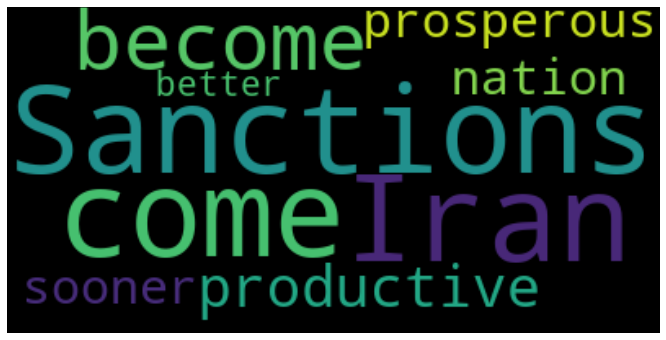

In [76]:
# Start with one review:
tweets = mdf1.tweet[7370]
#text = " ".join(review for review in mdf.Tweet_Text)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "CO", "amp", "one","Im","said","d5tJPEiEYf"])


# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(tweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

##Tweets polarity

In [155]:
#Polarity
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
#sub = lambda x: TextBlob(x).sentiment.subjectivity

tweets['polarity'] = tweets['tweet'].apply(pol)
#tweets['subjectivity'] = tweets['tweet'].apply(sub)
tweets.head()

,Unnamed: 0,created_date,source,tweet,created_at,retweet_count,favorite_count,is_retweet,id_str,sentiment,neg,neu,pos,compound,id,human_date,month/day,year,month,year_month,day,day of week,hour,week,year_week,text encoded,polarity
0,0,2020-03-07 03:45:00,Twitter for iPhone,Thank you @GovBillLee and @MariaLeeTN. My Admi...,3/7/2020 3:45,9221,37544,False,1.236140e+18,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.0,0.753,0.247,0.7840,1.236140e+18,"Friday, Mar 6, 2020 10:45 PM",3/6/2020,2020,3,2020-03,6,5,22,9,2020-09,b'Thank you @GovBillLee and @MariaLeeTN. My Ad...,1.000000
1,1,2020-03-07 01:08:00,Twitter for iPhone,....I want to thank Acting Chief Mick Mulvaney...,3/7/2020 1:08,12193,57450,False,1.236100e+18,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",0.0,0.597,0.403,0.9158,1.236100e+18,"Friday, Mar 6, 2020 8:08 PM",3/6/2020,2020,3,2020-03,6,5,20,9,2020-09,b'....I want to thank Acting Chief Mick Mulvan...,0.223214
2,2,2020-03-07 01:08:00,Twitter for iPhone,I am pleased to announce that Congressman Mark...,3/7/2020 1:08,23997,108097,False,1.236100e+18,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.0,0.816,0.184,0.7264,1.236100e+18,"Friday, Mar 6, 2020 8:08 PM",3/6/2020,2020,3,2020-03,6,5,20,9,2020-09,b'I am pleased to announce that Congressman Ma...,0.340000
3,3,2020-03-07 00:19:00,Twitter for iPhone,Congratulations to @FoxNews! https://t.co/ED5t...,3/7/2020 0:19,17632,78051,False,1.236080e+18,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.0,0.417,0.583,0.6360,1.236080e+18,"Friday, Mar 6, 2020 7:19 PM",3/6/2020,2020,3,2020-03,6,5,19,9,2020-09,b'Congratulations to @FoxNews! https://t.co/ED...,0.000000
4,4,2020-03-06 21:21:00,Twitter for iPhone,https://t.co/TZ6o5jjPH7,3/6/2020 21:21,10410,41426,False,1.236040e+18,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,1.236040e+18,"Friday, Mar 6, 2020 4:21 PM",3/6/2020,2020,3,2020-03,6,5,16,9,2020-09,b'https://t.co/TZ6o5jjPH7',0.000000


##Polarity Histogram

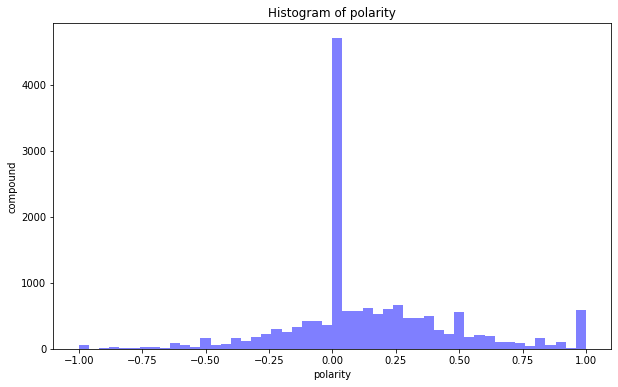

In [114]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(tweets.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('polarity')
plt.ylabel('compound')
plt.title('Histogram of polarity')
plt.show();

##Another approached for polarity 0 and 1

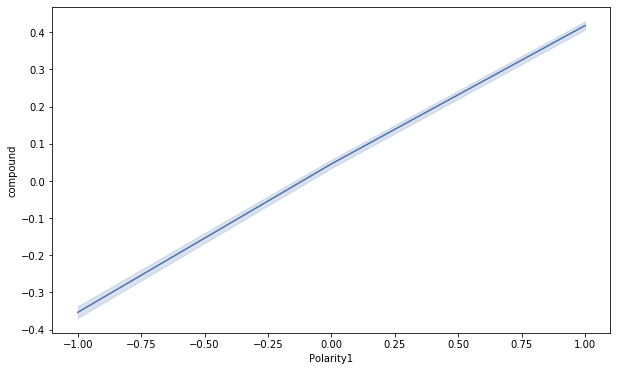

In [127]:
#Another approached for polarity 0 and 1
tweets['Polarity1'] = np.array([ analize_sentiment(tweet) 
  for tweet in tweets['tweet']])

tweets.head()